In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import re
import datetime
import tqdm
import calendar

In [25]:
z=glob.glob(r'C:\Users\Lenovo\Desktop\PG-18\EDA\ED*.csv')
df =pd.DataFrame()
for file in tqdm.tqdm(z): #to check file loading %.
        temp = pd.read_csv(file, low_memory=False)
        df = pd.concat([df,temp],axis=0)

100%|██████████| 4/4 [00:25<00:00,  6.35s/it]


In [26]:
df = df.groupby(['start station id','starttime','stoptime','usertype','bikeid','gender','tripduration']).agg({'tripduration':['count']})


In [27]:
df = df.reset_index(drop=False)
df.columns = ['start station id','starttime','stoptime','usertype','bikeid','gender','tripduration','total_count']

In [28]:
df.head()

,start station id,starttime,stoptime,usertype,bikeid,gender,tripduration,total_count
0,72,2019-12-01 01:42:01.1640,2019-12-01 01:47:52.4120,Subscriber,19212,1,351,1
1,72,2019-12-01 01:44:45.7500,2019-12-01 01:53:18.6970,Subscriber,28242,1,512,1
2,72,2019-12-01 02:30:37.2390,2019-12-01 02:33:50.3310,Subscriber,25662,2,193,1
3,72,2019-12-01 02:36:37.0300,2019-12-01 02:46:59.0820,Subscriber,38780,1,622,1
4,72,2019-12-01 06:19:57.5770,2019-12-01 06:47:51.6330,Subscriber,18900,1,1674,1


In [29]:
df.shape

(4411093, 8)

In [30]:
df.dtypes

start station id     int64
starttime           object
stoptime            object
usertype            object
bikeid               int64
gender               int64
tripduration         int64
total_count          int64
dtype: object

In [31]:
df['starttime']=pd.to_datetime(df['starttime'])
df['stoptime']=pd.to_datetime(df['stoptime'])

<AxesSubplot:xlabel='usertype', ylabel='count'>

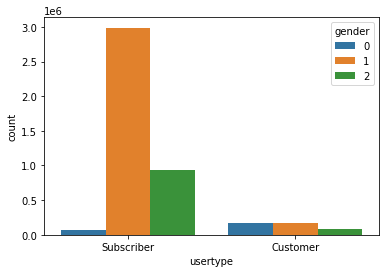

In [32]:
sns.countplot(x='usertype',hue= 'gender',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

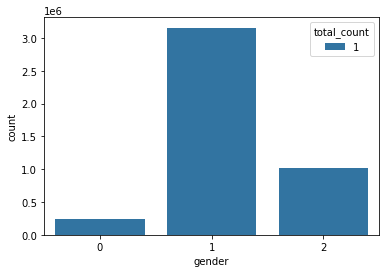

In [33]:
sns.countplot(x='gender',hue= 'total_count',data=df)

In [34]:
df['start_month_num'] = df['starttime'].dt.month
month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
df["start_month_name"]= df["start_month_num"].apply(lambda y:month_dict[y])
df["start_month_name"].unique()
df['start_year'] = df['starttime'].dt.year
df["start_year"].unique()

array([2019, 2020], dtype=int64)

In [35]:
df.head()

,start station id,starttime,stoptime,usertype,bikeid,gender,tripduration,total_count,start_month_num,start_month_name,start_year
0,72,2019-12-01 01:42:01.164,2019-12-01 01:47:52.412,Subscriber,19212,1,351,1,12,December,2019
1,72,2019-12-01 01:44:45.750,2019-12-01 01:53:18.697,Subscriber,28242,1,512,1,12,December,2019
2,72,2019-12-01 02:30:37.239,2019-12-01 02:33:50.331,Subscriber,25662,2,193,1,12,December,2019
3,72,2019-12-01 02:36:37.030,2019-12-01 02:46:59.082,Subscriber,38780,1,622,1,12,December,2019
4,72,2019-12-01 06:19:57.577,2019-12-01 06:47:51.633,Subscriber,18900,1,1674,1,12,December,2019


In [37]:
df["start_day_num"] = df["starttime"].dt.dayofweek
day_dict = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
df["start_day_name"]= df["start_day_num"].apply(lambda y:day_dict[y])

In [39]:
df["weekend"] = np.where(df["start_day_num"] > 5, True, False)

In [40]:
df.head()

,start station id,starttime,stoptime,usertype,bikeid,gender,tripduration,total_count,start_month_num,start_month_name,start_year,start_day_num,start_day_name,weekend
0,72,2019-12-01 01:42:01.164,2019-12-01 01:47:52.412,Subscriber,19212,1,351,1,12,December,2019,6,Saturday,True
1,72,2019-12-01 01:44:45.750,2019-12-01 01:53:18.697,Subscriber,28242,1,512,1,12,December,2019,6,Saturday,True
2,72,2019-12-01 02:30:37.239,2019-12-01 02:33:50.331,Subscriber,25662,2,193,1,12,December,2019,6,Saturday,True
3,72,2019-12-01 02:36:37.030,2019-12-01 02:46:59.082,Subscriber,38780,1,622,1,12,December,2019,6,Saturday,True
4,72,2019-12-01 06:19:57.577,2019-12-01 06:47:51.633,Subscriber,18900,1,1674,1,12,December,2019,6,Saturday,True


In [43]:
df.dtypes

start station id             int64
starttime           datetime64[ns]
stoptime            datetime64[ns]
usertype                    object
bikeid                       int64
gender                       int64
tripduration                 int64
total_count                  int64
start_month_num              int64
start_month_name            object
start_year                   int64
start_day_num                int64
start_day_name              object
weekend                       bool
dtype: object

<AxesSubplot:xlabel='start_month_name', ylabel='count'>

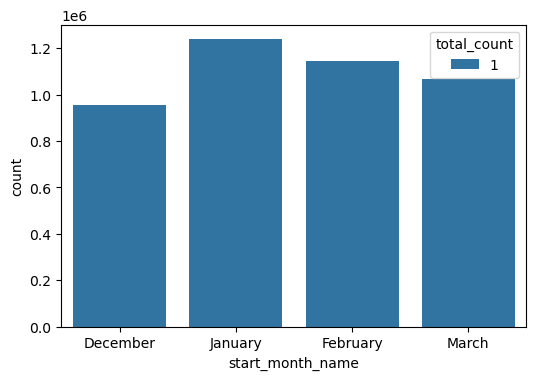

In [50]:
plt.figure(dpi=100)
sns.countplot(x='start_month_name',hue='total_count',data=df)

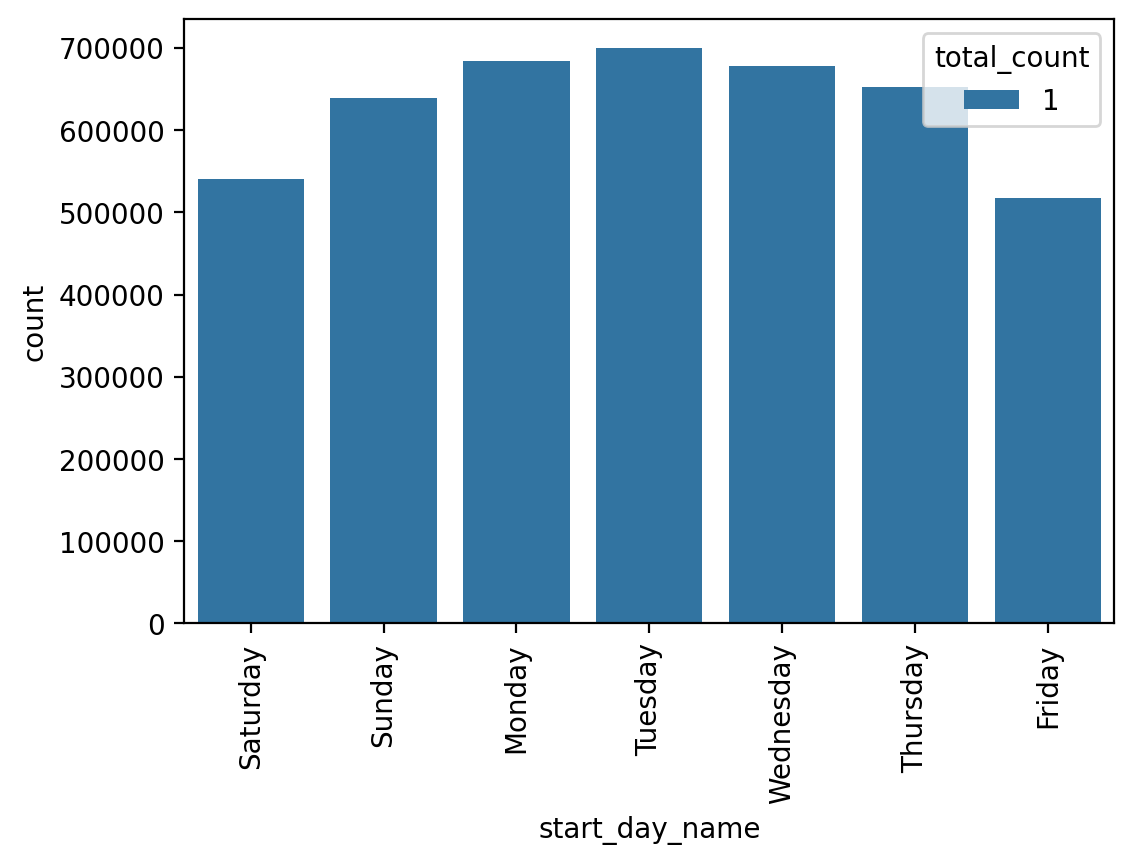

In [49]:
plt.figure(dpi=200)
sns.countplot(x='start_day_name',hue='total_count',data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='start_year', ylabel='count'>

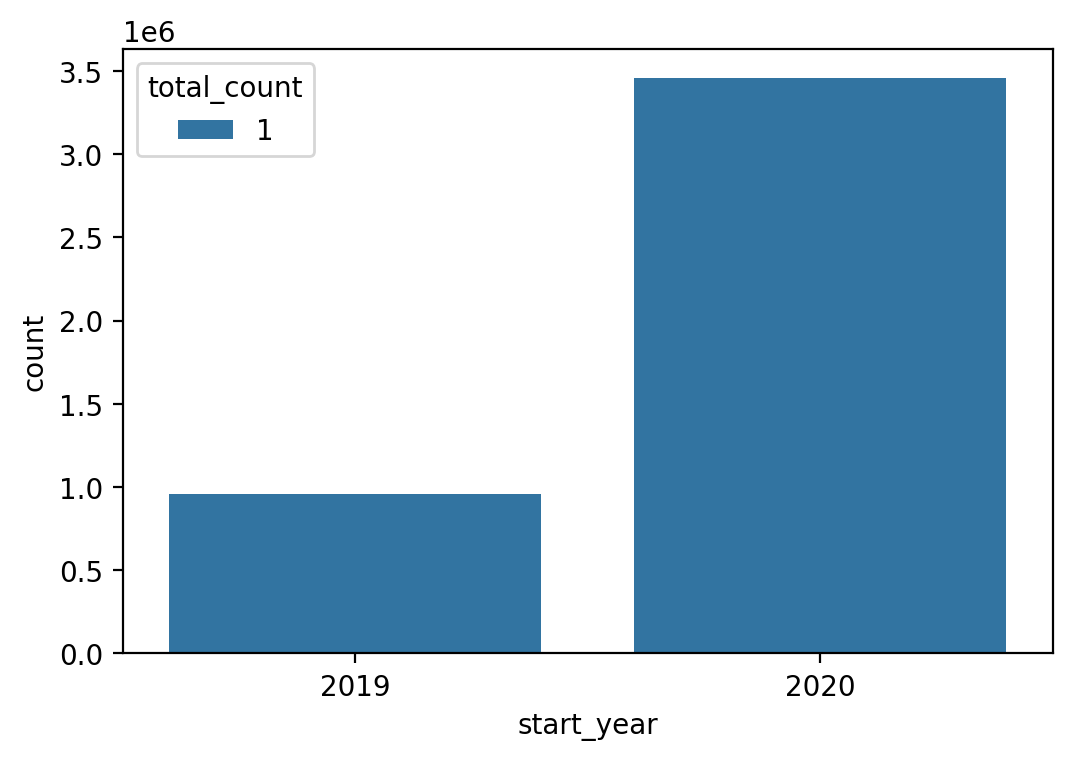

In [51]:
plt.figure(dpi=200)
sns.countplot(x='start_year',hue='total_count',data=df)

In [52]:
df['hour']= df.starttime.dt.hour

<AxesSubplot:xlabel='hour', ylabel='count'>

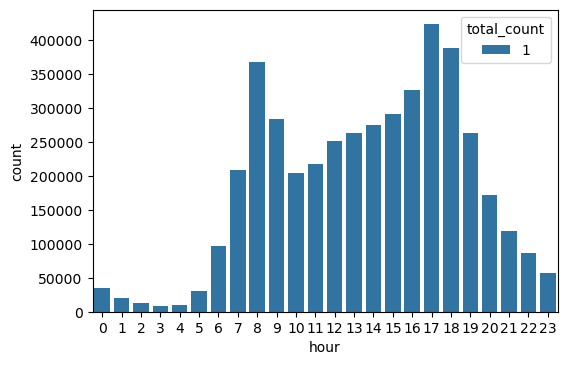

In [53]:
plt.figure(dpi=100)
sns.countplot(x='hour',hue='total_count',data=df)

<AxesSubplot:xlabel='start station id', ylabel='count'>

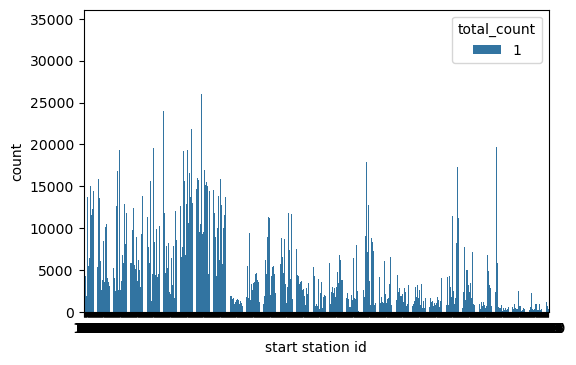

In [57]:
plt.figure(dpi=100)
sns.countplot(x='start station id',hue='total_count',data=df)

In [59]:
df['tripduration'].mean()

887.696197745094

In [63]:
y= df.groupby('start station id')['total_count'].count()

In [68]:
y = y.reset_index(drop=False)
y.columns=['stationid','total_count']
y.head()

,stationid,total_count
0,72,10653
1,79,5149
2,82,3196
3,83,4263
4,116,16218


<AxesSubplot:xlabel='stationid', ylabel='total_count'>

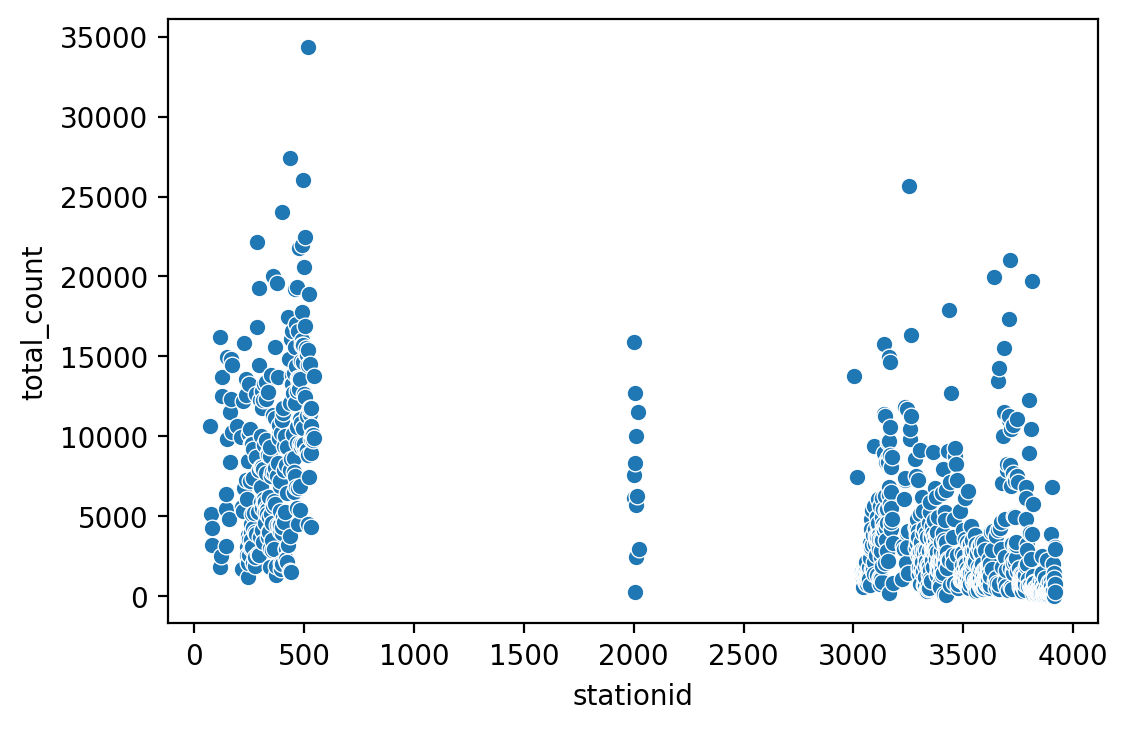

In [77]:
plt.figure(dpi=200)
sns.scatterplot(x='stationid',y='total_count',data=y)

In [80]:
x=y[(y['stationid']<700)]

<AxesSubplot:xlabel='stationid', ylabel='total_count'>

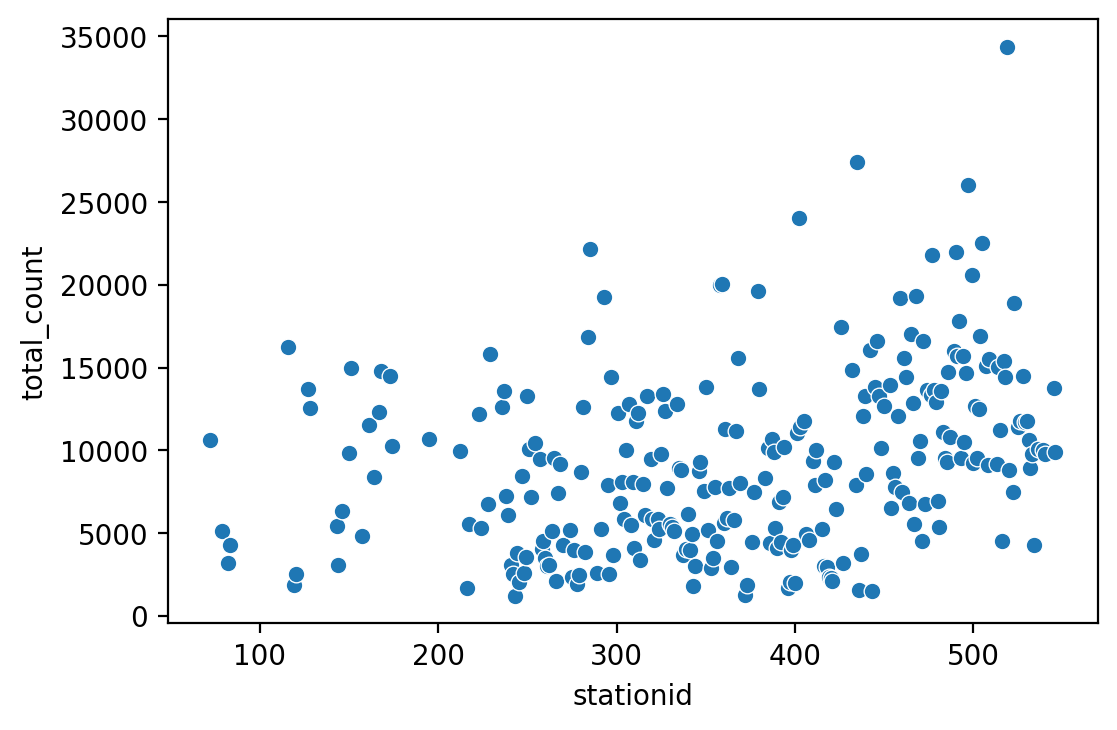

In [82]:
plt.figure(dpi=200)
sns.scatterplot(x='stationid',y='total_count',data=x)